<a href="https://colab.research.google.com/github/EndreGuljas/AER850_Project3/blob/main/AER850_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

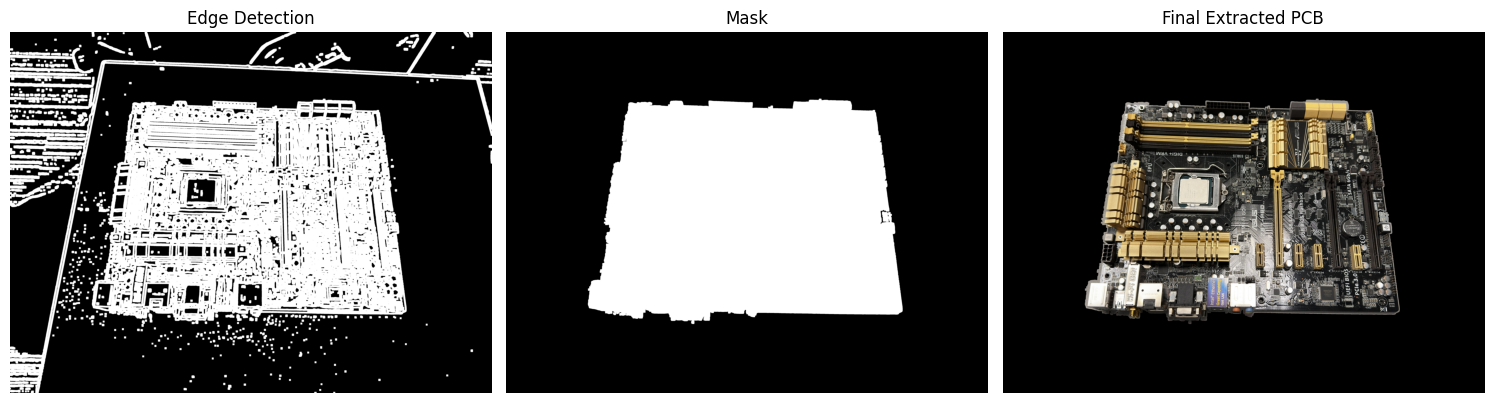

In [1]:
'''Step 1: Object Masking'''
import cv2
import numpy as np
from matplotlib import pyplot as plt

path = "/content/drive/MyDrive/aer850_project3/motherboard_image.JPEG"
img_real = cv2.imread(path, cv2.IMREAD_COLOR)
img_real = cv2.rotate(img_real, cv2.ROTATE_90_CLOCKWISE)

img = cv2.imread(path, cv2.IMREAD_COLOR)
img = cv2.GaussianBlur(img, (47, 47), 4)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 55, 7)
img_gray = cv2.rotate(img_gray, cv2.ROTATE_90_CLOCKWISE)

edges = cv2.Canny(img_gray, 50, 300)
edges = cv2.dilate(edges, None, iterations=10)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(img_real)
cv2.drawContours(image=mask, contours=[max(contours, key=cv2.contourArea)], contourIdx=-1, color=(255, 255, 255), thickness=cv2.FILLED)

masked_img = cv2.bitwise_and(mask, img_real)

edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
masked_img_rgb = cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB)
original_rgb = cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB)

# Plots
plt.figure(figsize=(20, 5))
plt.subplot(142)
plt.imshow(edges_rgb)
plt.title('Edge Detection')
plt.axis('off')

plt.subplot(143)
plt.imshow(mask_rgb)
plt.title('Mask')
plt.axis('off')

plt.subplot(144)
plt.imshow(masked_img_rgb)
plt.title('Final Extracted PCB')
plt.axis('off')

plt.tight_layout()
plt.show()

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 35.6 MB/s eta 0:00:00


In [3]:
'''Step 2: YOLOv8 Training'''
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
results = model.train(data='/content/drive/MyDrive/aer850_project3/data/data.yaml', epochs=170, batch=2, imgsz=1024, name='pcb_identifier')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 173MB/s]


Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/aer850_project3/data/data.yaml, epochs=170, time=None, patience=100, batch=2, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=pcb_identifier, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

100%|██████████| 755k/755k [00:00<00:00, 32.3MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 150MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/aer850_project3/data/train/labels... 544 images, 0 backgrounds, 0 corrupt: 100%|██████████| 544/544 [04:50<00:00,  1.87it/s]


train: New cache created: /content/drive/MyDrive/aer850_project3/data/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 108783. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/aer850_project3/data/valid/labels... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:55<00:00,  1.90it/s]

val: New cache created: /content/drive/MyDrive/aer850_project3/data/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 19108. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/pcb_identifier/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/pcb_identifier
Starting training for 170 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/170      3.68G      2.289      4.013      1.276        874       1024: 100%|██████████| 272/272 [00:58<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.49it/s]


                   all        105      19108      0.764     0.0724      0.065     0.0355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/170      6.57G      2.297      2.993      1.161        537       1024: 100%|██████████| 272/272 [00:55<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.64it/s]

                   all        105      19108      0.632      0.108     0.0855     0.0457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/170      4.98G      2.242      2.618      1.139        714       1024: 100%|██████████| 272/272 [00:55<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.16it/s]


                   all        105      19108      0.488      0.127      0.109     0.0592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/170      5.04G      2.186      2.424      1.116        590       1024: 100%|██████████| 272/272 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.53it/s]


                   all        105      19108      0.435      0.148       0.16      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/170      4.24G      2.135      2.352      1.112       1236       1024: 100%|██████████| 272/272 [00:54<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.42it/s]

                   all        105      19108      0.422      0.188      0.158     0.0933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/170      5.88G      2.099      2.181      1.101       1278       1024: 100%|██████████| 272/272 [00:54<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.71it/s]

                   all        105      19108      0.118      0.275       0.15     0.0889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/170      4.23G      2.089      2.153      1.103        762       1024: 100%|██████████| 272/272 [00:55<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.10it/s]

                   all        105      19108      0.391      0.259      0.173      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/170      3.78G      2.051      2.089      1.089        491       1024: 100%|██████████| 272/272 [00:54<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.70it/s]

                   all        105      19108      0.337      0.247      0.189      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/170      4.62G      2.015      2.034      1.075        408       1024: 100%|██████████| 272/272 [00:54<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.21it/s]

                   all        105      19108      0.381      0.267      0.215      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/170      6.67G      1.999      1.965      1.064       1569       1024: 100%|██████████| 272/272 [00:54<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.09it/s]

                   all        105      19108      0.486       0.26      0.222      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/170       3.7G      1.992       1.92      1.064        400       1024: 100%|██████████| 272/272 [00:55<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.06it/s]

                   all        105      19108      0.531      0.287      0.254      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/170      4.75G      1.974      1.908      1.062        492       1024: 100%|██████████| 272/272 [00:55<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.73it/s]

                   all        105      19108      0.581      0.303      0.269       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/170      4.66G      1.956       1.88      1.066        681       1024: 100%|██████████| 272/272 [00:54<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.49it/s]

                   all        105      19108      0.576      0.302      0.285      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/170      3.88G      1.932      1.835      1.053        485       1024: 100%|██████████| 272/272 [00:55<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.46it/s]


                   all        105      19108      0.642      0.266      0.284      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/170      6.37G      1.916      1.826      1.047        674       1024: 100%|██████████| 272/272 [00:54<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:09<00:00,  2.85it/s]

                   all        105      19108      0.558      0.327      0.309      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/170      6.07G      1.904      1.784      1.051        459       1024: 100%|██████████| 272/272 [00:55<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.18it/s]

                   all        105      19108      0.544      0.353      0.314      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/170         5G        1.9      1.776      1.044        766       1024: 100%|██████████| 272/272 [00:55<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.12it/s]

                   all        105      19108       0.59       0.37      0.331      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/170      5.44G      1.914      1.732      1.037        635       1024: 100%|██████████| 272/272 [00:55<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.14it/s]

                   all        105      19108      0.559      0.354       0.35      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/170      4.51G      1.901      1.731      1.041        369       1024: 100%|██████████| 272/272 [00:54<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.94it/s]


                   all        105      19108      0.641      0.355      0.361       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/170      3.36G      1.919      1.712      1.048        680       1024: 100%|██████████| 272/272 [00:55<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.89it/s]

                   all        105      19108      0.544      0.368      0.368      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/170      4.46G      1.846      1.672      1.023        686       1024: 100%|██████████| 272/272 [00:55<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.18it/s]

                   all        105      19108       0.56       0.37      0.383      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/170      8.02G      1.865       1.64      1.039        414       1024: 100%|██████████| 272/272 [00:54<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.13it/s]

                   all        105      19108      0.593      0.353      0.387      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/170      5.36G      1.861      1.638      1.031        821       1024: 100%|██████████| 272/272 [00:54<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.72it/s]

                   all        105      19108      0.654      0.358      0.388      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/170         5G      1.828      1.612      1.027        540       1024: 100%|██████████| 272/272 [00:54<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.96it/s]

                   all        105      19108      0.431       0.38      0.376      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/170      4.65G      1.856      1.609      1.022        808       1024: 100%|██████████| 272/272 [00:55<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.09it/s]

                   all        105      19108      0.664      0.345      0.405      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/170       6.2G      1.841      1.613      1.027        247       1024: 100%|██████████| 272/272 [00:54<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.99it/s]

                   all        105      19108      0.435      0.397      0.405      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/170      4.44G      1.825       1.57      1.017        491       1024: 100%|██████████| 272/272 [00:54<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.11it/s]

                   all        105      19108      0.527       0.39      0.421       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/170       5.3G      1.802      1.552      1.022        500       1024: 100%|██████████| 272/272 [00:56<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.61it/s]

                   all        105      19108       0.49      0.421      0.418      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/170      4.28G      1.818      1.573      1.019        921       1024: 100%|██████████| 272/272 [00:55<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.93it/s]

                   all        105      19108      0.446      0.401      0.411      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/170      5.38G      1.782      1.534      1.016        449       1024: 100%|██████████| 272/272 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.43it/s]

                   all        105      19108      0.625      0.371      0.418      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/170      6.07G      1.787      1.546       1.01        623       1024: 100%|██████████| 272/272 [00:55<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.23it/s]

                   all        105      19108      0.522      0.407      0.451      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/170      4.59G       1.82      1.516      1.015        381       1024: 100%|██████████| 272/272 [00:54<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:08<00:00,  3.35it/s]

                   all        105      19108      0.417       0.49      0.448      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/170      4.63G      1.753      1.472      1.008        678       1024: 100%|██████████| 272/272 [00:53<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.44it/s]

                   all        105      19108      0.474      0.461      0.458      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/170      5.21G      1.768       1.49      1.009        220       1024: 100%|██████████| 272/272 [00:54<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.18it/s]

                   all        105      19108      0.593       0.39      0.441      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/170      3.93G       1.77      1.496      1.001        157       1024: 100%|██████████| 272/272 [00:54<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.68it/s]


                   all        105      19108      0.507      0.476      0.476      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/170      5.75G      1.776      1.468      1.007        515       1024: 100%|██████████| 272/272 [00:54<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.91it/s]

                   all        105      19108      0.461      0.495      0.485       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/170      5.06G      1.774      1.452     0.9991        877       1024: 100%|██████████| 272/272 [00:55<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.41it/s]

                   all        105      19108      0.557       0.48      0.495      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/170      3.63G      1.734      1.443     0.9978        713       1024: 100%|██████████| 272/272 [00:54<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]

                   all        105      19108      0.498      0.498      0.502      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/170      5.78G      1.764      1.463      1.002        749       1024: 100%|██████████| 272/272 [00:55<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.31it/s]

                   all        105      19108      0.552      0.515      0.527      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/170      5.74G      1.773      1.443      1.003        379       1024: 100%|██████████| 272/272 [00:54<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.95it/s]


                   all        105      19108       0.52      0.507      0.502      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/170      5.37G      1.742      1.421      1.001       1014       1024: 100%|██████████| 272/272 [00:54<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.49it/s]

                   all        105      19108      0.534      0.456      0.474      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/170      4.13G      1.743      1.398     0.9972        336       1024: 100%|██████████| 272/272 [00:54<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.69it/s]

                   all        105      19108      0.527      0.522       0.52      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/170      4.42G      1.742      1.412     0.9977        284       1024: 100%|██████████| 272/272 [00:55<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.17it/s]

                   all        105      19108      0.551      0.506      0.531      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/170      6.34G      1.704      1.368     0.9921        355       1024: 100%|██████████| 272/272 [00:55<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.78it/s]

                   all        105      19108      0.583      0.511      0.535      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/170      5.48G      1.704      1.372     0.9881        291       1024: 100%|██████████| 272/272 [00:55<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.66it/s]

                   all        105      19108      0.542      0.522       0.53      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/170      4.65G      1.723      1.369     0.9947        701       1024: 100%|██████████| 272/272 [00:54<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.85it/s]


                   all        105      19108      0.551      0.525      0.533      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/170      4.47G      1.702      1.357     0.9844       1231       1024: 100%|██████████| 272/272 [00:54<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.59it/s]

                   all        105      19108      0.593      0.496       0.51      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/170       3.9G      1.696      1.349     0.9847        454       1024: 100%|██████████| 272/272 [00:54<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.70it/s]

                   all        105      19108      0.561      0.553      0.561      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/170      6.32G      1.707      1.344     0.9849        517       1024: 100%|██████████| 272/272 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.23it/s]

                   all        105      19108      0.599      0.527      0.557      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/170      4.16G      1.715      1.352     0.9897        332       1024: 100%|██████████| 272/272 [00:54<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]

                   all        105      19108      0.623      0.526      0.545      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/170      4.24G      1.698       1.33     0.9855        658       1024: 100%|██████████| 272/272 [00:55<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.59it/s]

                   all        105      19108      0.579      0.555      0.562      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/170       5.3G      1.711      1.317     0.9829        206       1024: 100%|██████████| 272/272 [00:55<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.42it/s]


                   all        105      19108      0.579      0.528      0.552      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/170      6.03G      1.709      1.324     0.9861        630       1024: 100%|██████████| 272/272 [00:54<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.76it/s]

                   all        105      19108      0.614      0.496      0.545      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/170      5.08G      1.691      1.301     0.9745        931       1024: 100%|██████████| 272/272 [00:55<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.84it/s]

                   all        105      19108       0.62       0.54      0.569      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/170      4.95G      1.647       1.28     0.9748        339       1024: 100%|██████████| 272/272 [00:54<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.36it/s]


                   all        105      19108      0.684      0.533      0.581      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/170      4.08G      1.683      1.304     0.9795        147       1024: 100%|██████████| 272/272 [00:54<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.97it/s]

                   all        105      19108      0.587      0.561      0.569       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/170      4.82G      1.655      1.276     0.9804        322       1024: 100%|██████████| 272/272 [00:54<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.75it/s]

                   all        105      19108      0.621      0.559      0.583      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/170      5.78G      1.687      1.278     0.9786        598       1024: 100%|██████████| 272/272 [00:54<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.66it/s]

                   all        105      19108      0.609      0.563      0.577      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/170      5.38G      1.648       1.25     0.9681        746       1024: 100%|██████████| 272/272 [00:54<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.94it/s]

                   all        105      19108      0.656      0.574      0.607      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/170      4.81G      1.636      1.265      0.975        656       1024: 100%|██████████| 272/272 [00:54<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.88it/s]

                   all        105      19108      0.607      0.575      0.603      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/170      5.06G      1.694      1.278     0.9782        816       1024: 100%|██████████| 272/272 [00:55<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.81it/s]


                   all        105      19108      0.617      0.576      0.595      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/170      4.43G      1.647      1.246     0.9688        600       1024: 100%|██████████| 272/272 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.86it/s]

                   all        105      19108      0.683      0.553        0.6      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/170      4.55G      1.643      1.244     0.9734        757       1024: 100%|██████████| 272/272 [00:56<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.78it/s]

                   all        105      19108      0.654      0.562      0.608      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/170      6.76G      1.655      1.239     0.9708        778       1024: 100%|██████████| 272/272 [00:55<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.44it/s]

                   all        105      19108      0.694      0.539      0.597        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/170      6.06G       1.64      1.234     0.9701        265       1024: 100%|██████████| 272/272 [00:54<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.72it/s]

                   all        105      19108      0.653      0.581      0.624      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/170         6G      1.681      1.257     0.9803        666       1024: 100%|██████████| 272/272 [00:54<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.83it/s]

                   all        105      19108      0.679      0.567       0.62      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/170      3.24G      1.654      1.221     0.9731        697       1024: 100%|██████████| 272/272 [00:54<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]


                   all        105      19108      0.672       0.57      0.614      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/170       5.4G      1.666      1.244      0.972        446       1024: 100%|██████████| 272/272 [00:54<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.74it/s]

                   all        105      19108      0.677      0.589      0.628      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/170       3.9G      1.636      1.224      0.965        271       1024: 100%|██████████| 272/272 [00:55<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.88it/s]

                   all        105      19108      0.668      0.596       0.62      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/170      5.83G      1.641      1.207     0.9643        366       1024: 100%|██████████| 272/272 [00:55<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.11it/s]


                   all        105      19108      0.697      0.597      0.632      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/170      4.58G      1.623      1.196     0.9602        731       1024: 100%|██████████| 272/272 [00:54<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.40it/s]

                   all        105      19108      0.683      0.595      0.633      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/170      5.25G       1.63      1.195     0.9689        732       1024: 100%|██████████| 272/272 [00:55<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.86it/s]

                   all        105      19108      0.706      0.585      0.634      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/170      4.24G      1.616      1.195     0.9678        685       1024: 100%|██████████| 272/272 [00:55<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.75it/s]


                   all        105      19108      0.697      0.585      0.622      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/170      4.29G      1.608      1.187     0.9625        445       1024: 100%|██████████| 272/272 [00:54<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.82it/s]

                   all        105      19108      0.699      0.572      0.631      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/170      7.73G      1.604      1.172     0.9687        482       1024: 100%|██████████| 272/272 [00:54<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.70it/s]

                   all        105      19108      0.717      0.576       0.63      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/170      4.98G      1.611      1.169     0.9649        180       1024: 100%|██████████| 272/272 [00:54<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.11it/s]


                   all        105      19108      0.677      0.606      0.633       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/170      5.98G      1.611      1.179     0.9665        815       1024: 100%|██████████| 272/272 [00:54<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all        105      19108      0.714      0.594       0.64      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/170      4.34G      1.596      1.169     0.9603        728       1024: 100%|██████████| 272/272 [00:54<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.76it/s]

                   all        105      19108      0.691      0.599       0.64      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/170      4.99G      1.615      1.173     0.9647        133       1024: 100%|██████████| 272/272 [00:54<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.72it/s]

                   all        105      19108      0.744      0.577      0.653      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/170      4.01G      1.599      1.163     0.9552        485       1024: 100%|██████████| 272/272 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]

                   all        105      19108      0.702      0.605      0.645       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/170      2.55G      1.583      1.149     0.9552        634       1024: 100%|██████████| 272/272 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.86it/s]

                   all        105      19108      0.733        0.6      0.658      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/170      5.11G      1.605      1.158     0.9559        553       1024: 100%|██████████| 272/272 [00:56<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.01it/s]

                   all        105      19108      0.698      0.604      0.644      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/170      3.98G      1.586      1.144     0.9589        608       1024: 100%|██████████| 272/272 [00:53<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]

                   all        105      19108      0.686      0.597      0.645      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/170      5.11G      1.609      1.166     0.9693        991       1024: 100%|██████████| 272/272 [00:55<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.56it/s]

                   all        105      19108      0.729      0.616      0.668      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/170       5.1G      1.613      1.138       0.96        764       1024: 100%|██████████| 272/272 [00:55<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.93it/s]

                   all        105      19108      0.703      0.612      0.651      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/170      5.08G      1.581      1.124     0.9534        244       1024: 100%|██████████| 272/272 [00:54<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.86it/s]

                   all        105      19108       0.73      0.589      0.661      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/170      5.26G      1.596      1.131     0.9511        767       1024: 100%|██████████| 272/272 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.16it/s]

                   all        105      19108      0.684      0.629      0.674      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/170      6.89G      1.601      1.145     0.9538        188       1024: 100%|██████████| 272/272 [00:54<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.14it/s]

                   all        105      19108      0.745      0.613      0.672      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/170       4.1G      1.582      1.134     0.9519        434       1024: 100%|██████████| 272/272 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.67it/s]

                   all        105      19108      0.702      0.637      0.668      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/170      5.36G      1.594      1.134     0.9472        922       1024: 100%|██████████| 272/272 [00:55<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.11it/s]

                   all        105      19108       0.73      0.627      0.671      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/170      4.99G       1.61      1.136     0.9529        802       1024: 100%|██████████| 272/272 [00:56<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.84it/s]


                   all        105      19108      0.727      0.617      0.668      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/170      2.84G      1.566      1.119     0.9584        756       1024: 100%|██████████| 272/272 [00:55<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.74it/s]

                   all        105      19108      0.759      0.602      0.674      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/170      5.44G      1.577      1.119     0.9497        403       1024: 100%|██████████| 272/272 [00:56<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.90it/s]

                   all        105      19108      0.768        0.6      0.669      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/170      4.15G      1.561      1.115     0.9457       1006       1024: 100%|██████████| 272/272 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.06it/s]

                   all        105      19108      0.747      0.615      0.674      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/170      5.18G      1.554      1.104     0.9497        452       1024: 100%|██████████| 272/272 [00:55<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.72it/s]

                   all        105      19108      0.765      0.599      0.671      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/170      5.48G      1.571      1.104     0.9548        462       1024: 100%|██████████| 272/272 [00:55<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.06it/s]

                   all        105      19108       0.73      0.626      0.678      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/170       7.1G      1.595      1.119     0.9566        337       1024: 100%|██████████| 272/272 [00:55<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.07it/s]

                   all        105      19108      0.761      0.623      0.679       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/170       7.5G      1.555      1.095     0.9465        466       1024: 100%|██████████| 272/272 [00:54<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.64it/s]


                   all        105      19108      0.729      0.645      0.686      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/170      3.79G      1.571       1.11     0.9515        308       1024: 100%|██████████| 272/272 [00:54<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.99it/s]

                   all        105      19108      0.744      0.639      0.683      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/170      4.97G      1.554      1.087     0.9414        215       1024: 100%|██████████| 272/272 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.92it/s]

                   all        105      19108      0.765      0.626      0.688      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/170      4.07G      1.566      1.094     0.9493        507       1024: 100%|██████████| 272/272 [00:55<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.00it/s]


                   all        105      19108      0.739       0.63       0.69      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/170      5.14G      1.552      1.085     0.9487        238       1024: 100%|██████████| 272/272 [00:54<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.33it/s]

                   all        105      19108      0.734      0.633      0.688      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/170      6.27G      1.544      1.079     0.9461        672       1024: 100%|██████████| 272/272 [00:55<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.03it/s]

                   all        105      19108      0.756      0.641      0.686      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/170      5.67G      1.527      1.059     0.9437        847       1024: 100%|██████████| 272/272 [00:55<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]


                   all        105      19108      0.773      0.635      0.691       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/170      3.88G      1.544       1.08     0.9424        322       1024: 100%|██████████| 272/272 [00:55<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.97it/s]

                   all        105      19108      0.722       0.65      0.693       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/170      6.18G      1.553      1.076     0.9409       1159       1024: 100%|██████████| 272/272 [00:55<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.15it/s]

                   all        105      19108      0.741      0.639      0.688      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/170      6.26G      1.557      1.079      0.946        725       1024: 100%|██████████| 272/272 [00:55<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.05it/s]


                   all        105      19108      0.763       0.63      0.684      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/170      4.68G      1.541      1.081     0.9443        370       1024: 100%|██████████| 272/272 [00:54<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.71it/s]

                   all        105      19108      0.773       0.64      0.702      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/170      5.24G      1.516      1.057     0.9475        275       1024: 100%|██████████| 272/272 [00:55<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.95it/s]

                   all        105      19108      0.759      0.634        0.7      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/170       6.9G      1.541      1.063     0.9436        309       1024: 100%|██████████| 272/272 [00:56<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.33it/s]


                   all        105      19108      0.779      0.644      0.698      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/170      4.58G      1.542       1.06     0.9383        210       1024: 100%|██████████| 272/272 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.60it/s]

                   all        105      19108      0.748      0.644        0.7      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/170      4.67G      1.552      1.076     0.9464        675       1024: 100%|██████████| 272/272 [00:56<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.02it/s]

                   all        105      19108      0.761      0.645      0.706      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/170      4.89G      1.551      1.069     0.9398        807       1024: 100%|██████████| 272/272 [00:56<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.23it/s]


                   all        105      19108      0.778      0.634      0.701      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/170      7.17G      1.535      1.068     0.9467        129       1024: 100%|██████████| 272/272 [00:54<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.72it/s]

                   all        105      19108      0.742      0.651      0.705      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/170      5.66G       1.51      1.044     0.9375        512       1024: 100%|██████████| 272/272 [00:56<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.09it/s]

                   all        105      19108      0.753      0.656      0.702      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/170      5.29G      1.511      1.052     0.9385        290       1024: 100%|██████████| 272/272 [00:55<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.12it/s]

                   all        105      19108      0.753      0.648      0.704      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/170      5.69G      1.525      1.042     0.9347        299       1024: 100%|██████████| 272/272 [00:55<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.60it/s]


                   all        105      19108      0.769      0.638      0.701      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/170      5.48G       1.52      1.052     0.9338        153       1024: 100%|██████████| 272/272 [00:55<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.80it/s]

                   all        105      19108       0.78      0.641      0.706      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/170      6.01G      1.537      1.055     0.9408        366       1024: 100%|██████████| 272/272 [00:54<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.02it/s]

                   all        105      19108      0.773      0.648      0.708      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/170       5.1G      1.532      1.052     0.9412        327       1024: 100%|██████████| 272/272 [00:55<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.71it/s]


                   all        105      19108      0.759      0.648      0.707      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/170      5.49G      1.524      1.045     0.9396        870       1024: 100%|██████████| 272/272 [00:55<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.87it/s]

                   all        105      19108      0.776      0.643      0.712      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/170      3.82G      1.544      1.054     0.9408        383       1024: 100%|██████████| 272/272 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.12it/s]

                   all        105      19108      0.756      0.667      0.713      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/170      4.41G      1.504      1.034     0.9367        419       1024: 100%|██████████| 272/272 [00:55<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.65it/s]


                   all        105      19108      0.774      0.662      0.719      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/170      4.38G      1.519      1.034      0.932        714       1024: 100%|██████████| 272/272 [00:55<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.22it/s]

                   all        105      19108      0.768      0.654      0.712      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/170      5.23G      1.514      1.025     0.9368        550       1024: 100%|██████████| 272/272 [00:56<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.00it/s]

                   all        105      19108      0.761      0.655      0.716      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/170      6.87G      1.529      1.032     0.9305        656       1024: 100%|██████████| 272/272 [00:55<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.51it/s]

                   all        105      19108       0.77      0.654      0.715      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/170      3.99G      1.519      1.027     0.9318        490       1024: 100%|██████████| 272/272 [00:55<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.56it/s]

                   all        105      19108      0.738      0.658       0.71      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/170      4.75G      1.523      1.035     0.9331        919       1024: 100%|██████████| 272/272 [00:55<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.10it/s]

                   all        105      19108      0.774      0.646      0.709      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/170      4.53G      1.516      1.019      0.933        899       1024: 100%|██████████| 272/272 [00:55<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.45it/s]

                   all        105      19108      0.789      0.633      0.713      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/170       5.8G      1.506      1.028     0.9349        539       1024: 100%|██████████| 272/272 [00:56<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.69it/s]

                   all        105      19108      0.786      0.643       0.71      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/170      4.87G      1.499       1.03     0.9366        692       1024: 100%|██████████| 272/272 [00:55<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.11it/s]

                   all        105      19108      0.769       0.65      0.709      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/170      3.87G      1.519      1.037      0.935        683       1024: 100%|██████████| 272/272 [00:55<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.47it/s]


                   all        105      19108      0.794      0.649      0.712      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/170      4.83G      1.504      1.018     0.9321        591       1024: 100%|██████████| 272/272 [00:55<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.28it/s]

                   all        105      19108      0.809      0.647      0.718       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/170      4.09G      1.498      1.015       0.93        225       1024: 100%|██████████| 272/272 [00:56<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.11it/s]

                   all        105      19108      0.771      0.661      0.712      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/170      4.33G      1.486       1.01     0.9253        156       1024: 100%|██████████| 272/272 [00:54<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.72it/s]


                   all        105      19108      0.783      0.654      0.715      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/170      5.01G      1.501      1.013      0.934        333       1024: 100%|██████████| 272/272 [00:55<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.71it/s]

                   all        105      19108      0.773      0.658      0.719      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/170      4.43G      1.503      1.013     0.9318        955       1024: 100%|██████████| 272/272 [00:55<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.03it/s]

                   all        105      19108      0.782       0.65      0.719      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/170       4.2G      1.505      1.019     0.9323        671       1024: 100%|██████████| 272/272 [00:54<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.01it/s]

                   all        105      19108      0.803      0.648      0.721      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/170      4.17G      1.507       1.02     0.9316        684       1024: 100%|██████████| 272/272 [00:55<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.18it/s]

                   all        105      19108      0.787      0.653      0.717      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/170      3.08G      1.487     0.9998     0.9283        404       1024: 100%|██████████| 272/272 [00:56<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.08it/s]

                   all        105      19108      0.765      0.675      0.722      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/170      5.42G      1.496      1.008     0.9322        887       1024: 100%|██████████| 272/272 [00:55<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.79it/s]

                   all        105      19108      0.789      0.668      0.725      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/170      4.92G      1.474     0.9847     0.9277       1007       1024: 100%|██████████| 272/272 [00:55<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.12it/s]

                   all        105      19108      0.808      0.665      0.732      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/170      5.35G      1.461     0.9931     0.9297        668       1024: 100%|██████████| 272/272 [00:55<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.21it/s]

                   all        105      19108      0.787      0.671      0.727      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/170      4.16G      1.489     0.9934     0.9336        612       1024: 100%|██████████| 272/272 [00:55<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.18it/s]


                   all        105      19108      0.813      0.665      0.725      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/170      4.21G      1.501      1.011     0.9376        411       1024: 100%|██████████| 272/272 [00:55<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.90it/s]

                   all        105      19108      0.824      0.653      0.726      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/170       3.3G      1.485      1.002     0.9277        808       1024: 100%|██████████| 272/272 [00:54<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.08it/s]

                   all        105      19108      0.794      0.672       0.73      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/170      3.54G      1.483     0.9945     0.9232        975       1024: 100%|██████████| 272/272 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.82it/s]


                   all        105      19108      0.809      0.661       0.73      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/170      5.94G      1.497     0.9991     0.9318        832       1024: 100%|██████████| 272/272 [00:55<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.11it/s]

                   all        105      19108       0.81      0.668      0.731       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/170      4.97G       1.47     0.9783     0.9279        517       1024: 100%|██████████| 272/272 [00:55<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.14it/s]

                   all        105      19108      0.806       0.66      0.727      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/170      4.21G      1.497     0.9957     0.9286        560       1024: 100%|██████████| 272/272 [00:56<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.18it/s]


                   all        105      19108      0.797      0.656      0.727      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/170      5.35G      1.489     0.9951     0.9242        408       1024: 100%|██████████| 272/272 [00:55<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.54it/s]

                   all        105      19108       0.78      0.673      0.728      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/170      4.34G      1.474     0.9901     0.9276        837       1024: 100%|██████████| 272/272 [00:55<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.99it/s]

                   all        105      19108      0.796      0.665      0.728      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/170      5.16G      1.456     0.9878     0.9261        274       1024: 100%|██████████| 272/272 [00:56<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.13it/s]

                   all        105      19108      0.814      0.662      0.731      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/170      4.59G      1.434     0.9728     0.9241        349       1024: 100%|██████████| 272/272 [00:55<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.99it/s]

                   all        105      19108      0.773      0.676      0.733      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/170       4.4G      1.478     0.9788     0.9283         67       1024: 100%|██████████| 272/272 [00:56<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.14it/s]

                   all        105      19108      0.826      0.664      0.732      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/170      5.77G      1.463     0.9847      0.921       1521       1024: 100%|██████████| 272/272 [00:56<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.45it/s]

                   all        105      19108        0.8      0.676      0.735      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/170      5.13G       1.47     0.9777      0.923        560       1024: 100%|██████████| 272/272 [00:55<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  3.87it/s]

                   all        105      19108      0.799      0.676      0.734      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/170      5.48G      1.472     0.9825     0.9224         73       1024: 100%|██████████| 272/272 [00:55<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.17it/s]

                   all        105      19108      0.792      0.668      0.733       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/170      3.99G      1.457     0.9701     0.9244       1146       1024: 100%|██████████| 272/272 [00:55<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.77it/s]


                   all        105      19108      0.812      0.674      0.736      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/170      5.11G      1.478     0.9791     0.9283       1338       1024: 100%|██████████| 272/272 [00:56<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.77it/s]

                   all        105      19108      0.813      0.667      0.735       0.53


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/170      2.82G      1.509      1.002     0.9226        373       1024: 100%|██████████| 272/272 [00:55<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.79it/s]

                   all        105      19108      0.766      0.664      0.723      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/170      3.64G      1.494     0.9896     0.9212        122       1024: 100%|██████████| 272/272 [00:55<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.02it/s]

                   all        105      19108      0.796      0.644       0.72      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/170      3.73G       1.47     0.9694     0.9213        444       1024: 100%|██████████| 272/272 [00:54<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.04it/s]


                   all        105      19108      0.787      0.656      0.724      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/170      3.32G      1.494      0.988     0.9221        299       1024: 100%|██████████| 272/272 [00:54<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.22it/s]

                   all        105      19108      0.775      0.655      0.719      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/170      3.15G      1.482     0.9744     0.9188        285       1024: 100%|██████████| 272/272 [00:52<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.66it/s]

                   all        105      19108      0.779      0.659      0.722      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/170      3.03G      1.473     0.9787     0.9225        308       1024: 100%|██████████| 272/272 [00:53<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.71it/s]

                   all        105      19108      0.803      0.646      0.722      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/170      2.63G      1.461     0.9543     0.9133        184       1024: 100%|██████████| 272/272 [00:55<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.61it/s]

                   all        105      19108       0.79      0.652      0.725      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/170       3.4G      1.479     0.9687     0.9217        566       1024: 100%|██████████| 272/272 [00:55<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.11it/s]

                   all        105      19108      0.808      0.647      0.726       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/170      3.17G      1.472     0.9704     0.9188        259       1024: 100%|██████████| 272/272 [00:55<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.03it/s]

                   all        105      19108      0.792      0.654      0.723      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/170      4.59G      1.459     0.9561     0.9193        396       1024: 100%|██████████| 272/272 [00:55<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.02it/s]

                   all        105      19108      0.783      0.653      0.724      0.518



170 epochs completed in 2.924 hours.
Optimizer stripped from runs/detect/pcb_identifier/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/pcb_identifier/weights/best.pt, 6.3MB

Validating runs/detect/pcb_identifier/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.34it/s]


                   all        105      19108      0.811      0.672      0.737      0.532
                Button         14         45      0.844      0.963      0.981      0.817
             Capacitor        104       7251      0.807       0.42      0.592      0.315
             Connector         76        659      0.803      0.868      0.885      0.677
                 Diode         11         53       0.63      0.415      0.443      0.331
Electrolytic Capacitor         15        160      0.907      0.931      0.962      0.692
                    IC         95       1322      0.831      0.905      0.925      0.698
              Inductor         12         45      0.957      0.622      0.735      0.563
                   Led         18        127      0.812      0.709      0.797      0.573
                  Pads         20        143      0.875      0.259      0.364      0.245
                  Pins         10        151      0.563      0.861      0.797      0.556
              Resisto

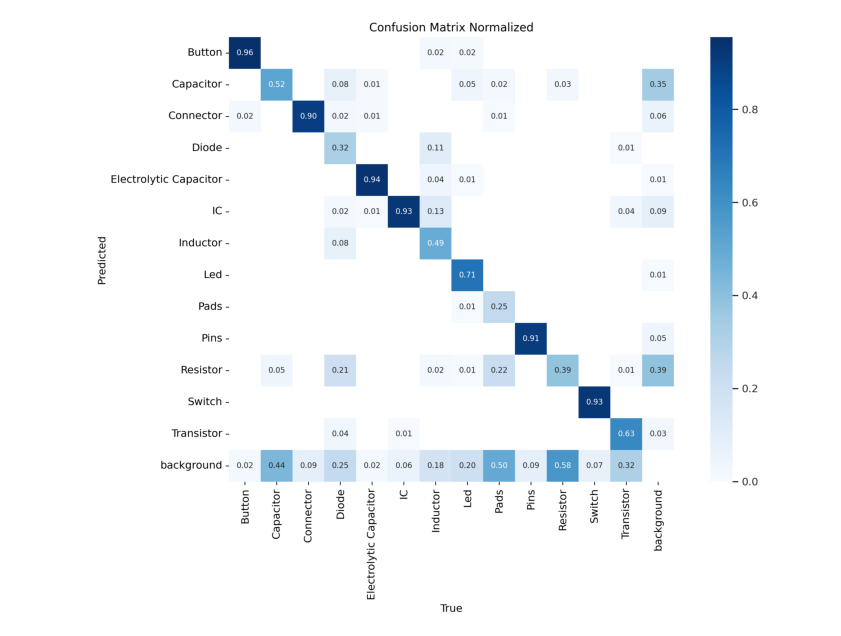

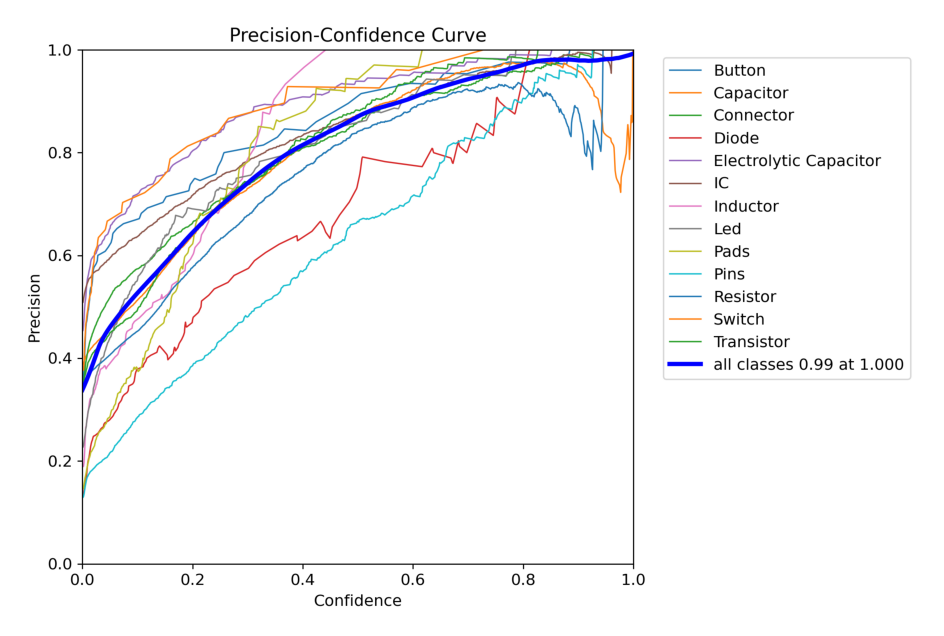

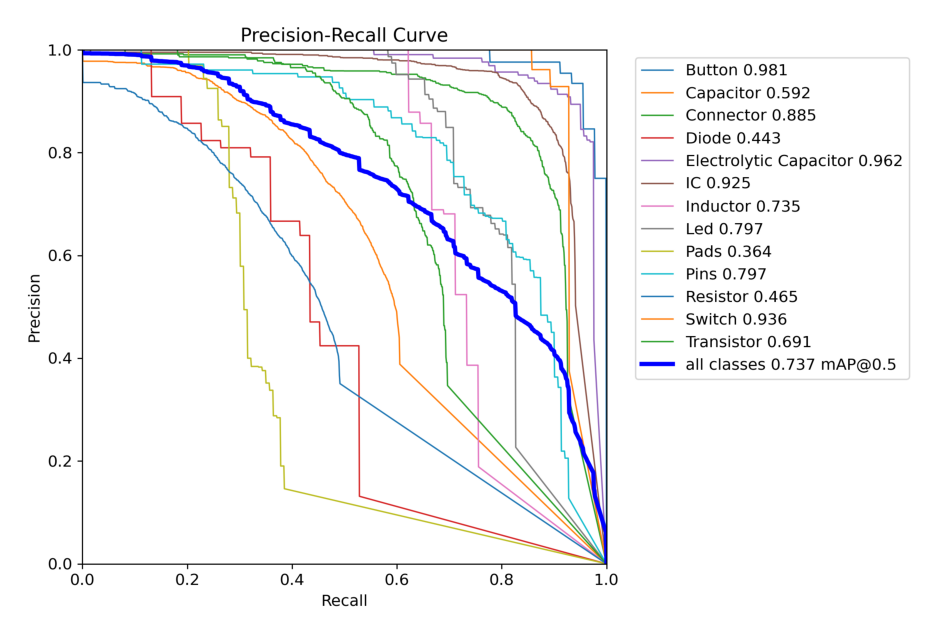

In [4]:
'''Step 2.5: Matrices and Graph Curves'''
import matplotlib.image as mpimg

# Normalized confusion matrix
conf_matrix = mpimg.imread('/content/runs/detect/pcb_identifier/confusion_matrix_normalized.png')
plt.figure(figsize=(12, 8))
plt.imshow(conf_matrix)
plt.axis('off')
plt.show()

# Precision-Confidence curve
pc_curve = mpimg.imread('/content/runs/detect/pcb_identifier/P_curve.png')
plt.figure(figsize=(12, 8))
plt.imshow(pc_curve)
plt.axis('off')
plt.show()

# Precision-Recall curve
pr_curve = mpimg.imread('/content/runs/detect/pcb_identifier/PR_curve.png')
plt.figure(figsize=(12, 8))
plt.imshow(pr_curve)
plt.axis('off')
plt.show()

In [ ]:
'''Step 3: YOLOv8 Evaluation'''
from google.colab.patches import cv2_imshow

model = YOLO('/content/runs/detect/pcb_identifier/weights/best.pt')

images1 = ['/content/drive/MyDrive/aer850_project3/data/evaluation/ardmega.jpg']

for img in images1:
    print(f"\nResults for: {img.split('/')[-1]}")
    results = model.predict(img, imgsz=1024, conf=0.25)
    cv2_imshow(results[0].plot())

In [ ]:
model = YOLO('/content/runs/detect/pcb_identifier/weights/best.pt')

images = [
    '/content/drive/MyDrive/aer850_project3/data/evaluation/arduno.jpg',
    '/content/drive/MyDrive/aer850_project3/data/evaluation/rasppi.jpg'
]

for img in images:
    print(f"\nResults for: {img.split('/')[-1]}")
    results = model.predict(img, imgsz=1024, conf=0.25)
    cv2_imshow(results[0].plot())